<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Fabián Rubilar A
## 201510509-K

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [296]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [338]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


In [339]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,Setosa
146,4.8,3.0,1.4,0.1,Setosa
147,4.9,3.1,1.5,0.1,Setosa
148,4.9,3.6,1.4,0.1,setosa


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [341]:
#Primero, por conveniencia le agregaremos una columna "index" al df, por lo tanto tenemos que:
df = df.reset_index()

#Luego reemplazamos ciertos valores que traen problemas. Entonces:
df.loc[df['species']=='Setosa','species'] = 'setosa'
df.loc[df['species']=='SETOSA','species'] = 'setosa'
df.loc[df['species']=='VIRGINICA','species'] = 'virginica'
df.loc[df['species']=='VERSICOLOR','species'] = 'versicolor'
df.loc[df['species']=='Versicolor','species'] = 'versicolor'

#Reemplazamos por "default" los elementos etiquetados por "nan" de todo el df
df.replace({'default': 'nan'})

#Según el enunciado, los tipos de especies son setosa-virginia-versicolor. Por tanto, reemplacemos el valor virginica:
df.loc[df['species']=='virginica','species'] = 'virginia'

#Como el df reconoce, por ejemplo, "virginica" con "virginica" como dos datos diferentes, lo corregimos de la siguiente forma:
df['species'] = df['species'].str.lower().str.strip()

#Finalmente, mostramos un conteo de los elementos de la columna "species"
print ('El conteo de elementos de la columna species es:')
df.groupby('species')['index'].count()


El conteo de elementos de la columna species es:


species
setosa        50
versicolor    49
virginia      50
Name: index, dtype: int64

In [342]:
#Por ahora, el df queda de la siguiente forma:
df.head()
del(df['level_0'])
df

,index,sepalLength,sepalWidth,petalLength,petalWidth,species
0,0,4.4,3.2,1.3,3.0,setosa
1,1,7.2,3.6,6.1,2.5,virginia
2,2,6.3,3.3,6.0,2.5,virginia
3,3,6.7,3.3,5.7,2.5,virginia
4,4,6.3,3.4,5.6,2.4,virginia
...,...,...,...,...,...,...
145,145,5.3,3.0,1.1,0.1,setosa
146,146,4.8,3.0,1.4,0.1,setosa
147,147,4.9,3.1,1.5,0.1,setosa
148,148,4.9,3.6,1.4,0.1,setosa


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

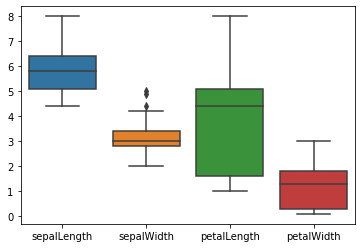

In [343]:
#Reemplazamos los valores 'nan' por 0
df.replace({'nan': 0})

#Procedemos a graficar lo pedido

graf_df = df.drop(['species', 'index'], axis=1)
sns.boxplot(data=graf_df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [344]:
#Agregamos la columna 'label', en base a las condiciones de largo y ancho de petalos y sepalos.

#df.loc[:,'label'] = ['valido-invalido']
df["label"] = df.apply(lambda x: 1 if float(x["sepalLength"]) >= 4.0 and float(x["sepalLength"])<=7.0 
                       and float(x["sepalWidth"])>=2.0 and float(x["sepalWidth"])<=4.5 
                       and float(x["petalLength"])>=1.0 and float(x["petalLength"])<=7.0 
                       and float(x["petalWidth"])>=0.1 and float(x["petalWidth"])<=2.5 else 0, axis=1)

df.head(20)


,index,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,0,4.4,3.2,1.3,3.0,setosa,0
1,1,7.2,3.6,6.1,2.5,virginia,0
2,2,6.3,3.3,6.0,2.5,virginia,1
3,3,6.7,3.3,5.7,2.5,virginia,1
4,4,6.3,3.4,5.6,2.4,virginia,1
5,5,6.7,3.1,5.6,2.4,virginia,1
6,6,5.8,2.8,5.1,2.4,virginia,1
7,7,6.2,3.4,5.4,2.3,virginia,1
8,8,6.7,3.0,5.2,2.3,virginia,1
9,9,6.8,3.2,5.9,2.3,virginia,1


In [345]:
#Podriamos ahora hacerlo de otra forma (Esto para facilitar el desarrollo de la pregunta 5)

mask_sepalLen_inf =  df['sepalLength']>=4.0
mask_sepalLen_sup =  df['sepalLength']<=7.0
mask_sepalL = mask_sepalLen_inf & mask_sepalLen_sup

mask_sepalWid_inf =  df['sepalWidth']>=2.0
mask_sepalWid_sup =  df['sepalWidth']<=4.5
mask_sepalW = mask_sepalWid_inf & mask_sepalWid_sup

mask_petalLen_inf =  df['petalLength']>=1.0
mask_petalLen_sup =  df['petalLength']<=7.0
mask_petalL = mask_petalLen_inf & mask_petalLen_sup

mask_petalWid_inf =  df['petalWidth']>=1.0
mask_petalWid_sup =  df['petalWidth']<=7.0
mask_petalW = mask_petalWid_inf & mask_petalWid_sup

mask_label= mask_sepalL & mask_sepalW & mask_petalL & mask_petalW

#Agregamos una columna "label" vacía

df['label'] = ''

#Vemos que el df que cumple con los datos validos es:

df_valido = df[mask_label]
df_valido['label'] = 'valido'

#Ahora agregemos los valores validos e invalidos al df original

for i in df.index:
    if i in df_valido.index:
        df['label'][i]='valido'
    else:
        df['label'][i]='invalido'
df



C:\Users\elele\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\elele\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\elele\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,0,4.4,3.2,1.3,3.0,setosa,valido
1,1,7.2,3.6,6.1,2.5,virginia,invalido
2,2,6.3,3.3,6.0,2.5,virginia,valido
3,3,6.7,3.3,5.7,2.5,virginia,valido
4,4,6.3,3.4,5.6,2.4,virginia,valido
...,...,...,...,...,...,...,...
145,145,5.3,3.0,1.1,0.1,setosa,invalido
146,146,4.8,3.0,1.4,0.1,setosa,invalido
147,147,4.9,3.1,1.5,0.1,setosa,invalido
148,148,4.9,3.6,1.4,0.1,setosa,invalido


4. Realice un gráfico de sepalLength vs petalLength y otro de sepalWidth vs petalWidth categorizados por la etiqueta label. Concluya sus resultados.


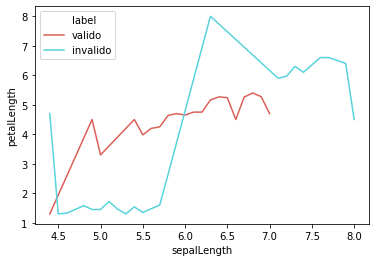

In [346]:
#Primero graficamos sepalLength vs petalLength 
palette = sns.color_palette("hls", 2)

sns.lineplot(
    x='sepalLength',
    y='petalLength',
    hue='label',
    data=df,
    ci = None,
    palette=palette
)

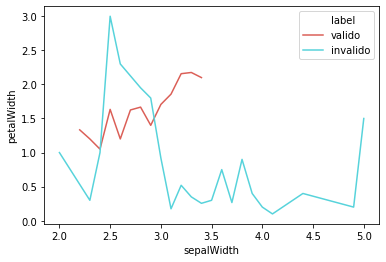

In [347]:
#Luego graficamos sepalWidth vs petalWidth 
palette = sns.color_palette("hls", 2)

sns.lineplot(
    x='sepalWidth',
    y='petalWidth',
    hue='label',
    data=df,
    ci = None,
    palette=palette
)

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

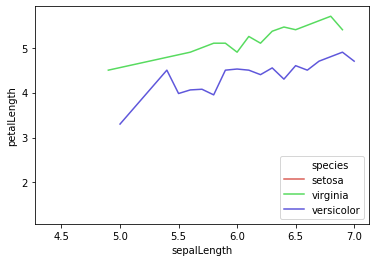

In [348]:
#En df_valido estan los datos filtrados (pregunta 3), por tanto:

df = df_valido

palette = sns.color_palette("hls", 3)

sns.lineplot(
    x = 'sepalLength',
    y = 'petalLength',
    hue = 'species',
    data = df,
    ci = None,
    palette = palette
)